In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

MySQLdb not found
Using mysql.connector


In [ ]:
init_params = []
for i in range(30):
    print
    print "Number %d" % (i,)
    model = SimplePolicyNetwork(hidden_dim=5,reg=0)
    box = simpleBox(mode="pro_only",length=50000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
    solver = SimpleRLPolicyGradientSolver(model, box,
                                        update_rule='adam',
                                        optim_config={
                                            'learning_rate': 0.01,
                                            'decay_rate': 1
                                        },
                                        init_rule='xavier',
                                        num_episodes=50,
                                        verbose=False,
                                        supervised = False,
                                        print_every=100)
    solver.init()
    init_params.append(solver.save_params())
    solver.train()

    box.change_mode("anti_only")
    solver.change_settings(learning_rate=0.01,num_episodes=50)
    solver.train()

    box.change_mode("alternative")
    solver.change_settings(learning_rate=0.01,num_episodes=2000)
    solver.train()

    solver.change_settings(learning_rate=0.005,num_episodes=1000)
    solver.train()
    
    rat = SimRat(model)
    box.change_mode("alternative")
    probs = rat.predict(box.X,box.y)
    ratname = 'VirtualRat'
    loss_history(solver, ratname)
    sample_probabilities(probs, ratname, sample = 100)
    sample_correct_rate(rat, sample = 100)
    trial_window = 3
    np.set_printoptions(precision=2)
    plt.ylim([0,1])
    draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [ ]:
weight_file = "good_weights/good_weights"
suffix = ".pkl"
good_list = []
i=0
for index in good_list:
    i+=1
    save_weights(weight_file+str(i)+suffix, init_params[index])

In [2]:
weight_file = "good_weights/good_weights"
loaded_params = load_weights(weight_file+"3.pkl")

In [3]:
box = simpleBox(mode="alternative",length=50000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y

In [4]:
model = SimplePolicyNetwork(hidden_dim=5,reg=0)
box = simpleBox(mode="pro_only",length=50000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
solver = SimpleRLPolicyGradientSolver(model, box,
                                    update_rule='adam',
                                    optim_config={
                                        'learning_rate': 0.01,
                                        'decay_rate': 1
                                    },
                                    init_rule='xavier',
                                    num_episodes=50,
                                    verbose=False,
                                    supervised = False,
                                    print_every=100)
solver.load_params(loaded_params)
solver.train()

box.change_mode("anti_only")
solver.change_settings(learning_rate=0.01,num_episodes=50)
solver.train()

box.change_mode("alternative")
solver.change_settings(learning_rate=0.01,num_episodes=1000)
solver.train()

Episode 100 complete (0.01s), loss: -1.53362905773, reward: 0, running reward: -0.183500741335
Episode 200 complete (0.01s), loss: -0.584173882541, reward: -2, running reward: 0.155459888017
Episode 300 complete (0.01s), loss: 3.21265523554, reward: 2, running reward: 0.432792621536
Episode 400 complete (0.02s), loss: -29.1809201367, reward: -2, running reward: 0.233792955368
Episode 500 complete (0.01s), loss: -5.48739211863, reward: -2, running reward: 0.59382883888
Episode 600 complete (0.01s), loss: -5.42390226535, reward: -2, running reward: 0.973539776199
Episode 700 complete (0.01s), loss: 4.21035473372, reward: 4, running reward: 1.28323915518
Episode 800 complete (0.01s), loss: -0.00137679700843, reward: 0, running reward: 1.3984591587
Episode 900 complete (0.01s), loss: 13.8610466835, reward: 0, running reward: 1.42246412959


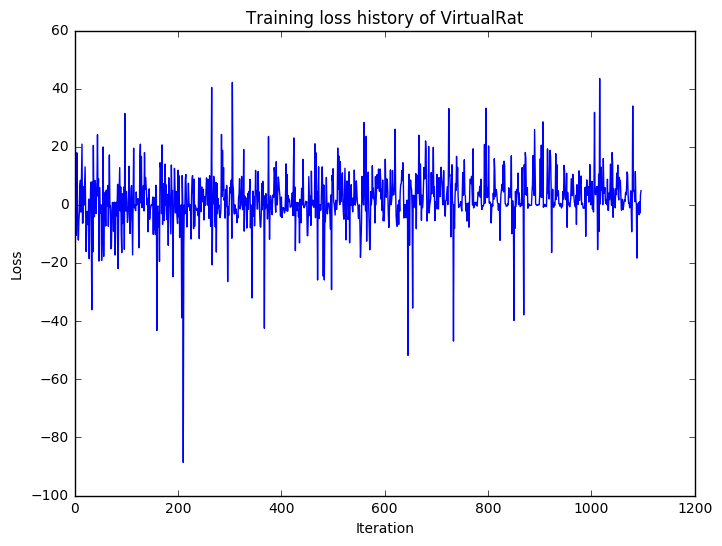

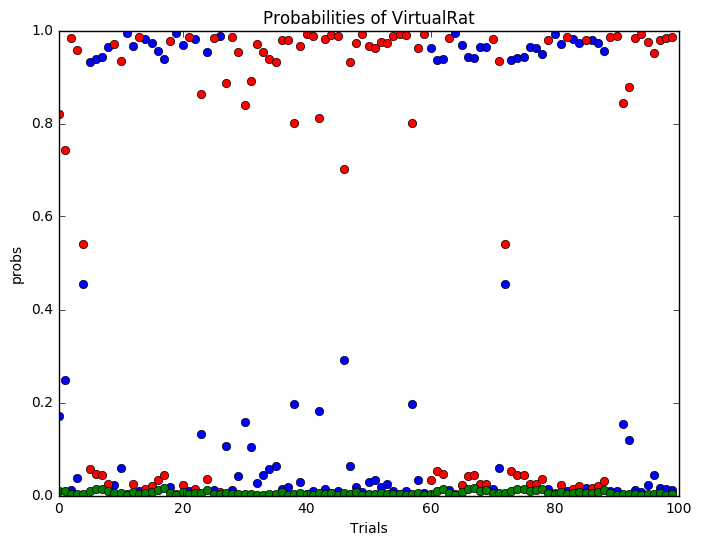

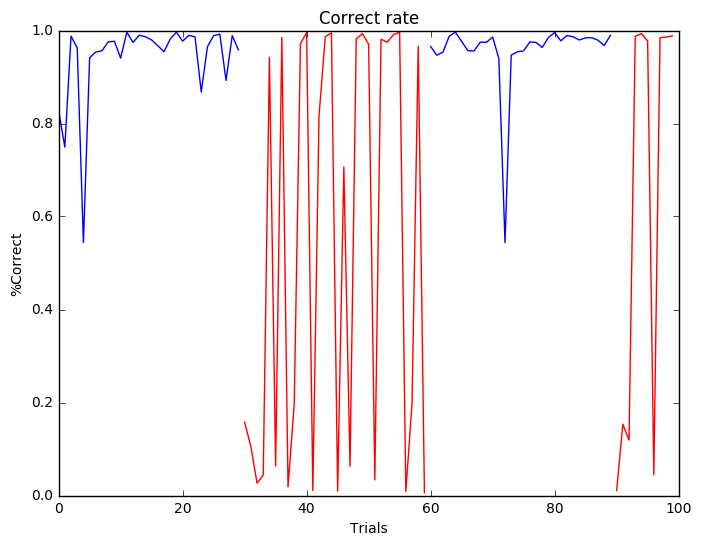

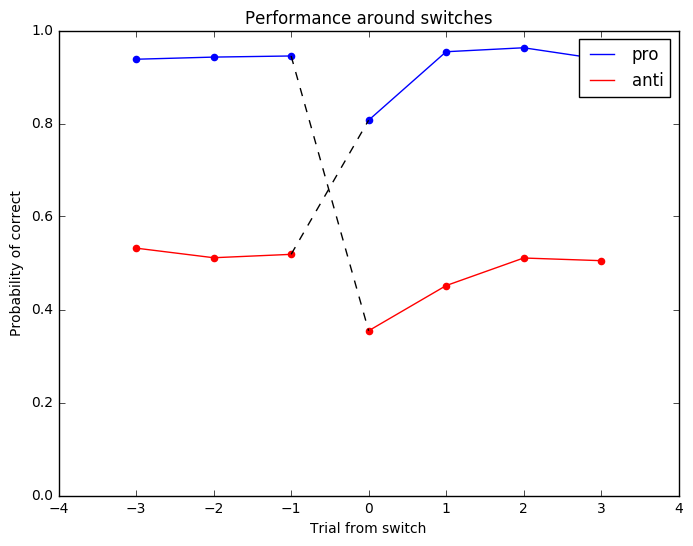

In [5]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [6]:
solver.change_settings(learning_rate=0.01,num_episodes=1000)
solver.train()

Episode 100 complete (0.01s), loss: 0.00321803869862, reward: 0, running reward: 1.799163666
Episode 200 complete (0.01s), loss: 0.678945772954, reward: 4, running reward: 1.94601850299
Episode 300 complete (0.01s), loss: 10.7483198257, reward: 2, running reward: 2.07829298123
Episode 400 complete (0.01s), loss: -0.0950640361622, reward: 0, running reward: 1.95267160925
Episode 500 complete (0.01s), loss: 8.18792342539, reward: 4, running reward: 2.38904799688
Episode 600 complete (0.01s), loss: 7.55015163724, reward: 4, running reward: 2.6584967804
Episode 700 complete (0.01s), loss: -12.0896827749, reward: 0, running reward: 2.88577611405
Episode 800 complete (0.01s), loss: 6.88928402061, reward: 2, running reward: 3.1484714648
Episode 900 complete (0.01s), loss: 3.93731256177, reward: 4, running reward: 3.36488964425


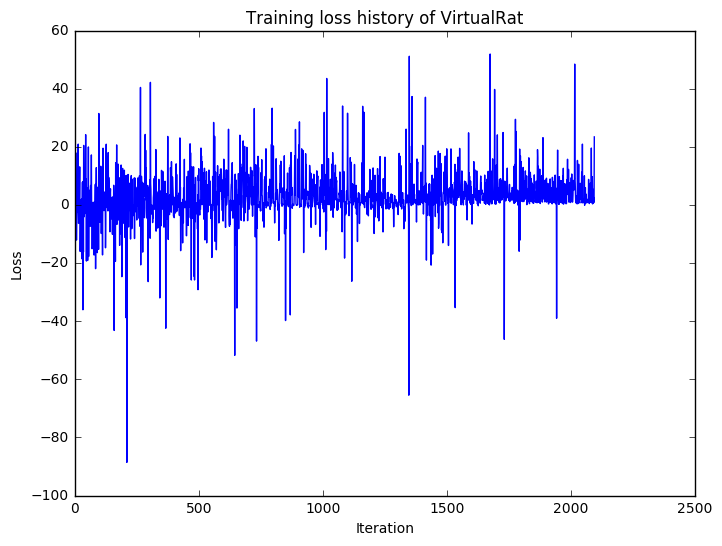

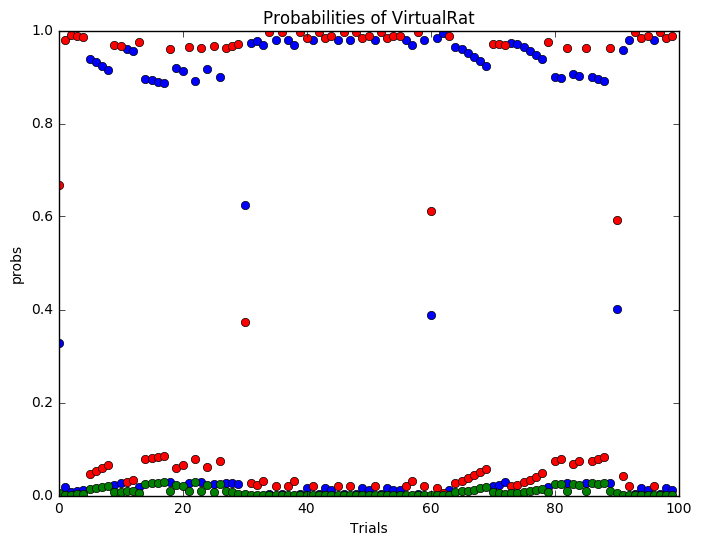

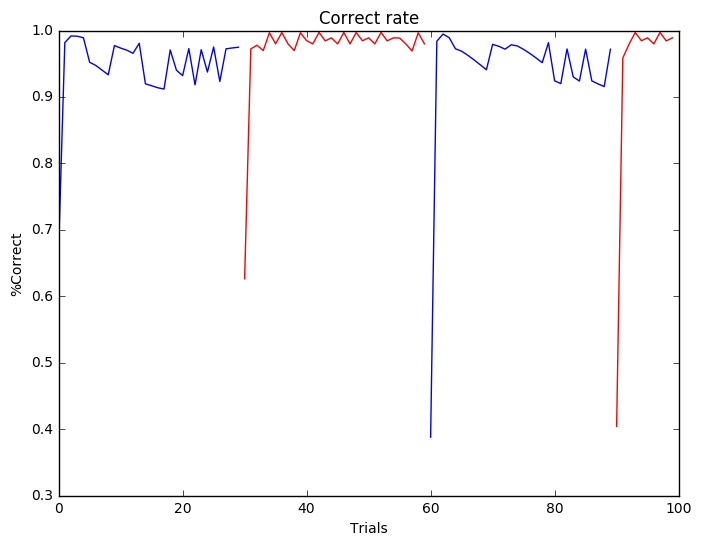

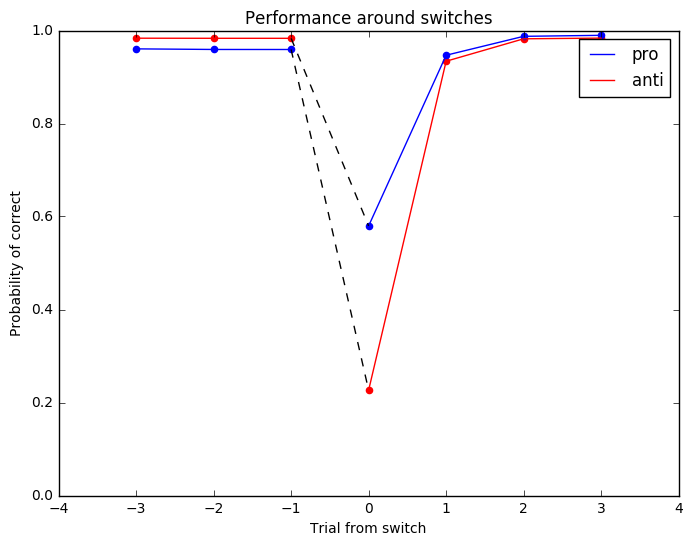

In [7]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [8]:
solver.change_settings(learning_rate=0.005,num_episodes=1000)
solver.train()

Episode 100 complete (0.02s), loss: 0.664210333486, reward: 4, running reward: 3.38885700069
Episode 200 complete (0.01s), loss: 1.41592999876, reward: 4, running reward: 3.50291327168
Episode 300 complete (0.01s), loss: 0.981531940385, reward: 4, running reward: 3.33067958415
Episode 400 complete (0.02s), loss: 0.617924445971, reward: 2, running reward: 3.08468826079
Episode 500 complete (0.02s), loss: 0.872574444253, reward: 4, running reward: 2.86526295464
Episode 600 complete (0.01s), loss: 0.768751142494, reward: 4, running reward: 3.26809826683
Episode 700 complete (0.01s), loss: 0.486724142623, reward: 4, running reward: 3.54906202379
Episode 800 complete (0.01s), loss: 0.744838248002, reward: 4, running reward: 3.66454645004
Episode 900 complete (0.01s), loss: 0.673700516448, reward: 4, running reward: 3.79399365639


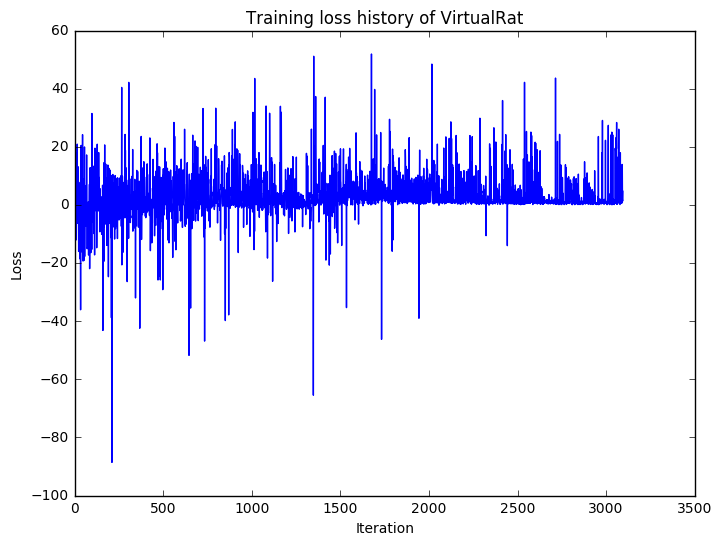

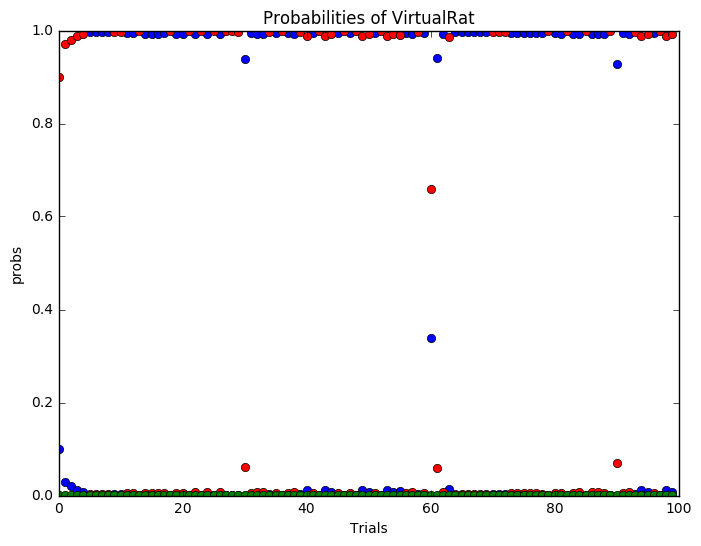

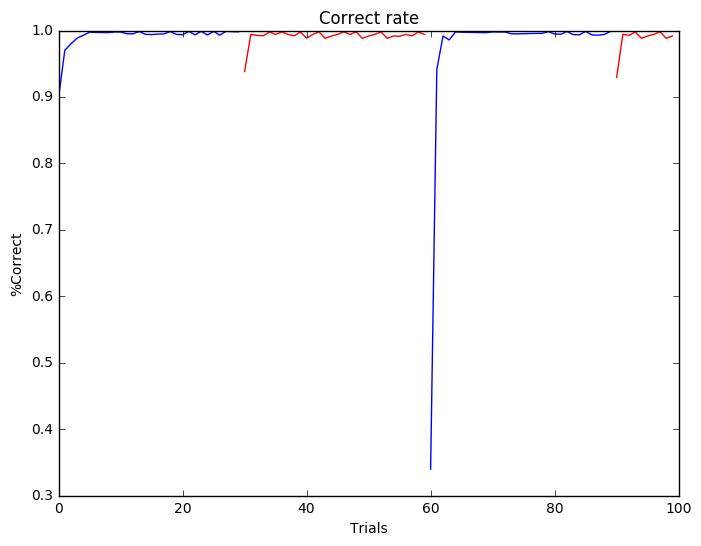

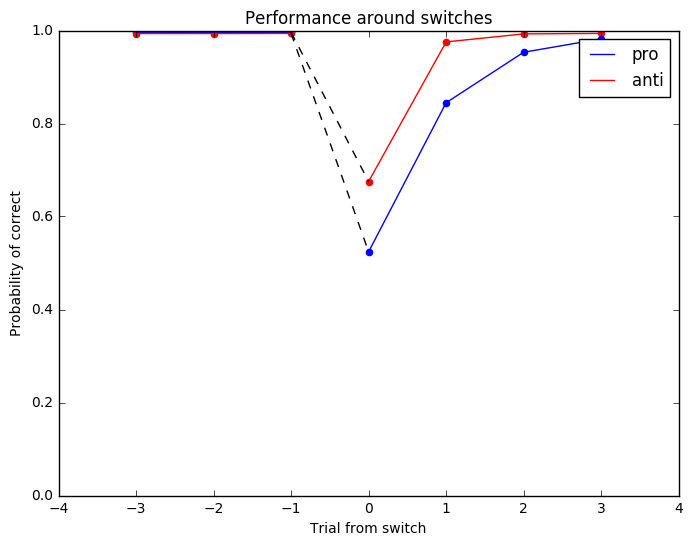

In [9]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [10]:
solver.change_settings(learning_rate=0.005,num_episodes=1000)
solver.train()

Episode 100 complete (0.01s), loss: 0.430468339695, reward: 4, running reward: 3.61581890524
Episode 200 complete (0.01s), loss: 0.497536360149, reward: 4, running reward: 3.59336157929
Episode 300 complete (0.01s), loss: 1.61432498541, reward: 2, running reward: 3.51683086101
Episode 400 complete (0.01s), loss: 0.413845659356, reward: 4, running reward: 3.50769954837
Episode 500 complete (0.01s), loss: 0.412775668355, reward: 4, running reward: 3.42712033263
Episode 600 complete (0.01s), loss: 0.387769417862, reward: 2, running reward: 3.40529432479
Episode 700 complete (0.01s), loss: 0.309129292867, reward: 4, running reward: 3.5820965289
Episode 800 complete (0.01s), loss: 0.194855407417, reward: 4, running reward: 3.60213340983
Episode 900 complete (0.01s), loss: 2.43594882163, reward: 4, running reward: 3.76360430207


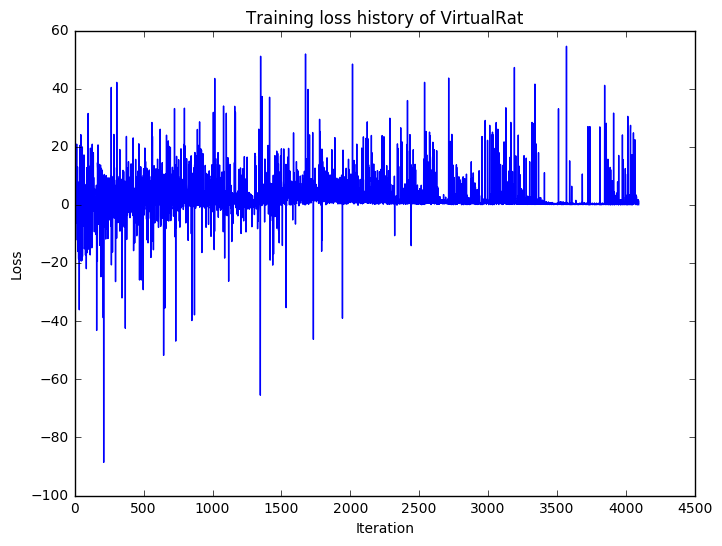

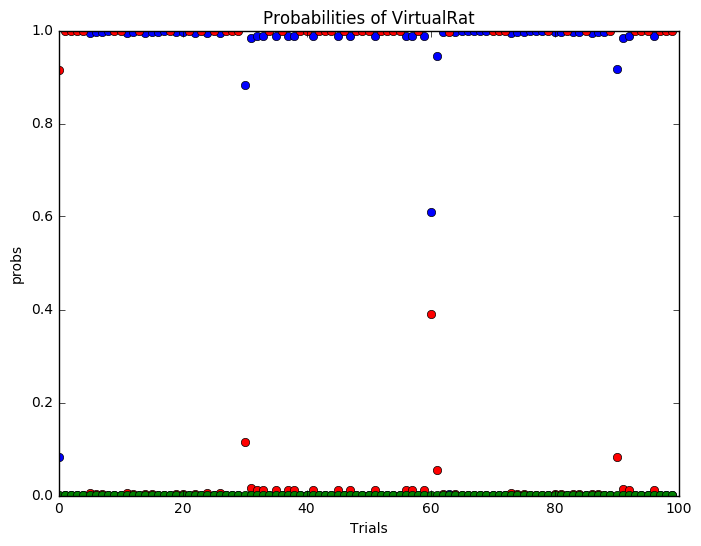

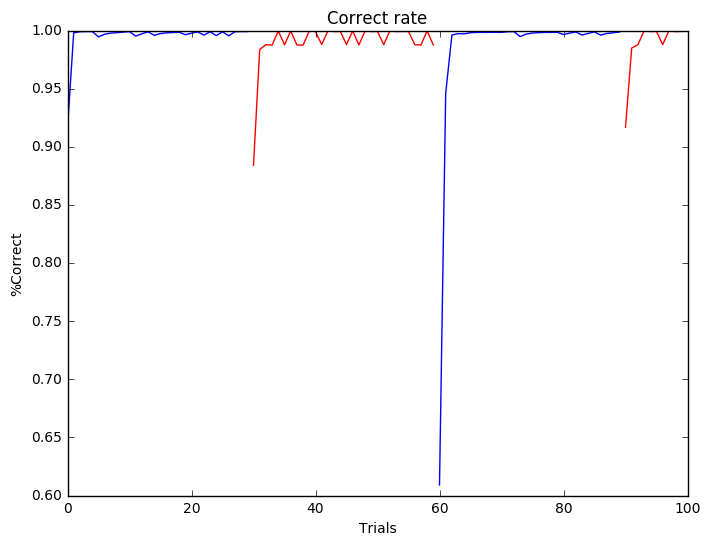

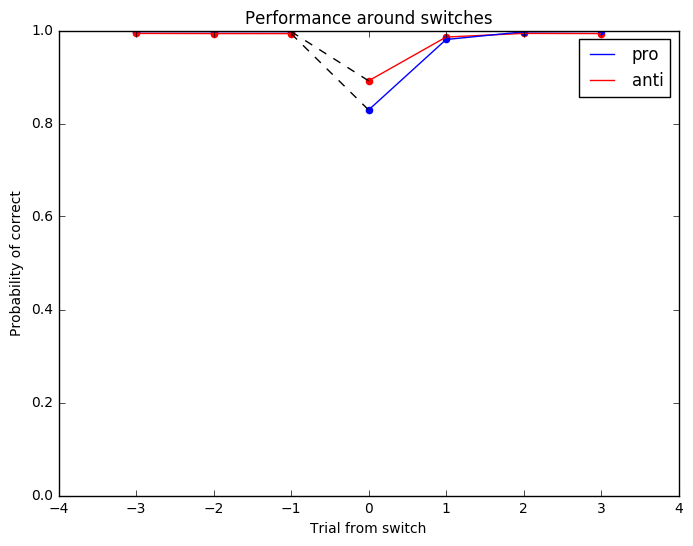

In [12]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [13]:
solver.change_settings(learning_rate=0.005,num_episodes=2000)
solver.train()

Episode 100 complete (0.02s), loss: 13.5639232532, reward: 2, running reward: 3.83899906075
Episode 200 complete (0.03s), loss: 0.0901518731053, reward: 4, running reward: 3.89976220725
Episode 300 complete (0.03s), loss: 0.251507748508, reward: 4, running reward: 3.91389802969
Episode 400 complete (0.02s), loss: 0.257605539981, reward: 4, running reward: 3.80685756402
Episode 500 complete (0.01s), loss: 1.27766602181, reward: 4, running reward: 3.90111453925
Episode 600 complete (0.01s), loss: 0.217036923677, reward: 4, running reward: 3.94387094384
Episode 700 complete (0.03s), loss: 0.490362079653, reward: 4, running reward: 3.94470549522
Episode 800 complete (0.01s), loss: 0.354334860822, reward: 4, running reward: 3.97976042296
Episode 900 complete (0.02s), loss: 0.34050759819, reward: 4, running reward: 3.9846581041
Episode 1000 complete (0.01s), loss: 0.261871189914, reward: 4, running reward: 3.98506675442
Episode 1100 complete (0.02s), loss: 0.14969485222, reward: 4, running r

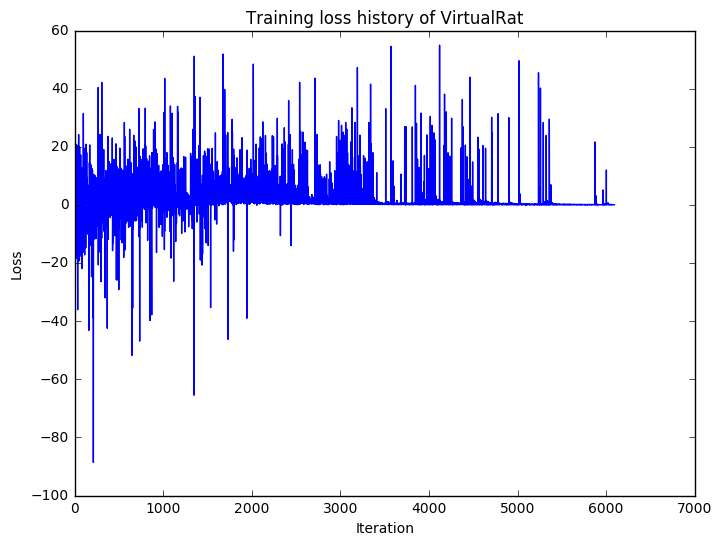

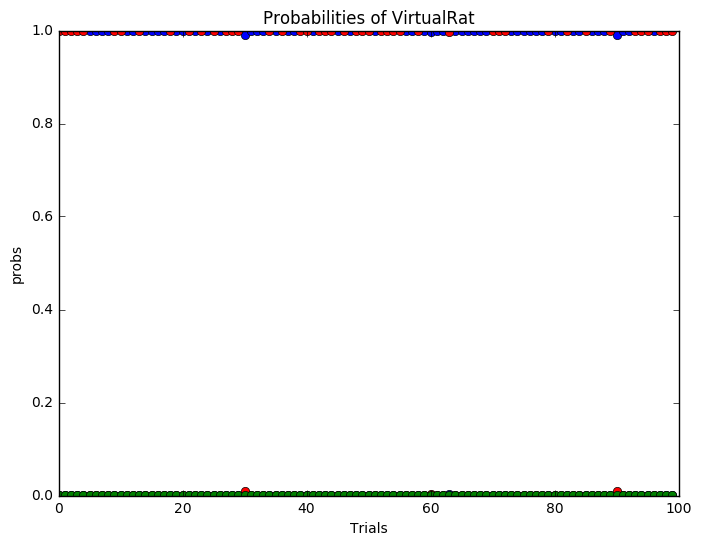

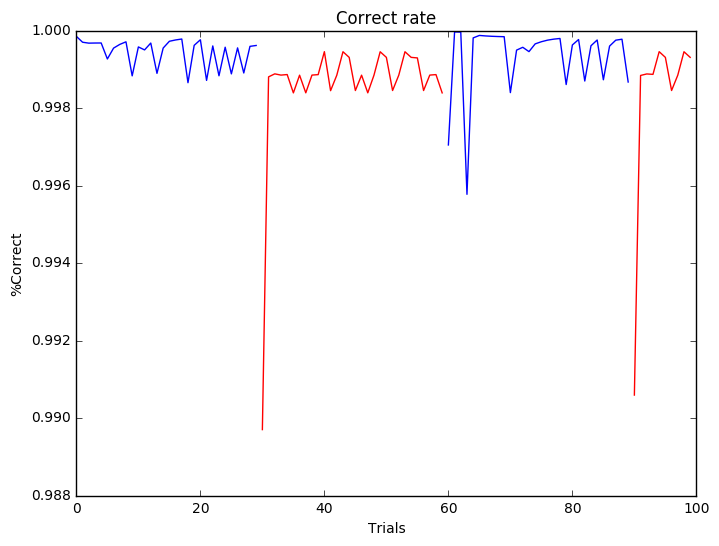

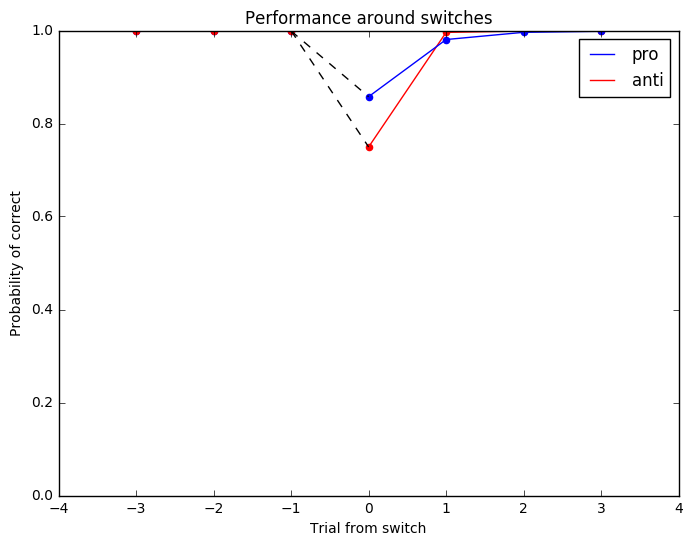

In [14]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [15]:
solver.change_settings(learning_rate=0.005,num_episodes=2000)
solver.train()

Episode 100 complete (0.01s), loss: 0.0496107842842, reward: 4, running reward: 3.95340008038
Episode 200 complete (0.01s), loss: 0.0472698935849, reward: 2, running reward: 3.90189138718
Episode 300 complete (0.01s), loss: 0.0292632255073, reward: 4, running reward: 3.9137493442
Episode 400 complete (0.01s), loss: 0.0499860858616, reward: 4, running reward: 3.88468635043
Episode 500 complete (0.01s), loss: 0.0722244974671, reward: 4, running reward: 3.909918892
Episode 600 complete (0.01s), loss: 0.0202321496427, reward: 4, running reward: 3.95147097395
Episode 700 complete (0.01s), loss: 0.0419792039566, reward: 4, running reward: 3.90133251725
Episode 800 complete (0.01s), loss: 0.0118928485687, reward: 2, running reward: 3.89555908059
Episode 900 complete (0.01s), loss: 0.0234833342745, reward: 4, running reward: 3.96177124575
Episode 1000 complete (0.01s), loss: 0.0542496362054, reward: 4, running reward: 3.95383335365
Episode 1100 complete (0.01s), loss: 0.00776882926816, reward:

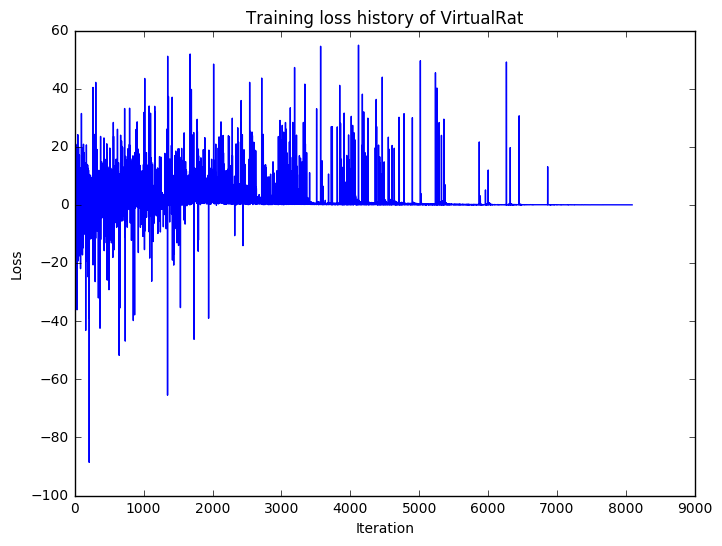

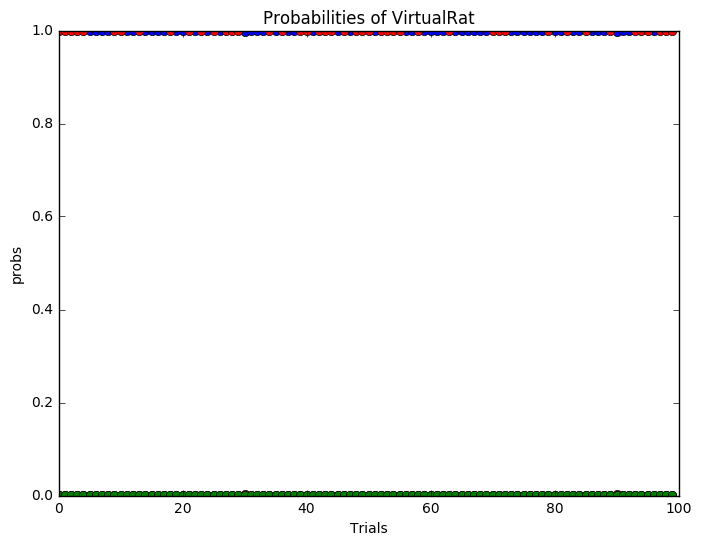

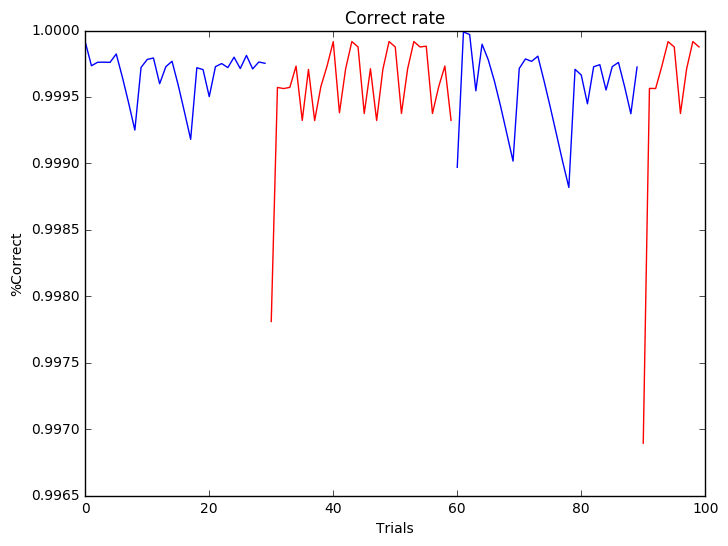

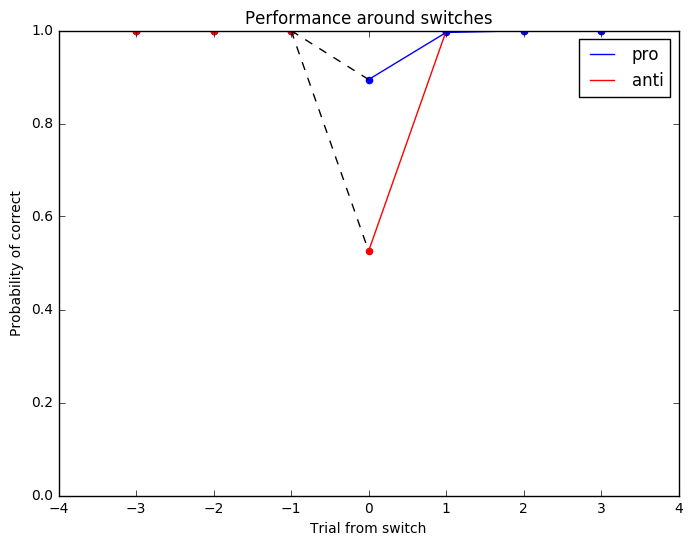

In [16]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)

In [17]:
solver.change_settings(learning_rate=0.005,num_episodes=2000)
solver.train()

Episode 100 complete (0.01s), loss: 0.0105466516979, reward: 4, running reward: 3.94006705811
Episode 200 complete (0.01s), loss: 0.0202742550758, reward: 4, running reward: 3.94154120933
Episode 300 complete (0.01s), loss: 0.0107431929171, reward: 4, running reward: 3.90469472793
Episode 400 complete (0.02s), loss: 0.00759845499419, reward: 4, running reward: 3.89162758576
Episode 500 complete (0.01s), loss: 0.516282885114, reward: 4, running reward: 3.92090764172
Episode 600 complete (0.02s), loss: 0.00542603110169, reward: 4, running reward: 3.9349181723
Episode 700 complete (0.01s), loss: 0.00695844546795, reward: 4, running reward: 3.9169375398
Episode 800 complete (0.01s), loss: 0.0344400211379, reward: 4, running reward: 3.90742775121
Episode 900 complete (0.01s), loss: 0.010855850261, reward: 4, running reward: 3.93014348562
Episode 1000 complete (0.01s), loss: 0.00935223004573, reward: 4, running reward: 3.94264533056
Episode 1100 complete (0.01s), loss: 0.0130013379187, rewar

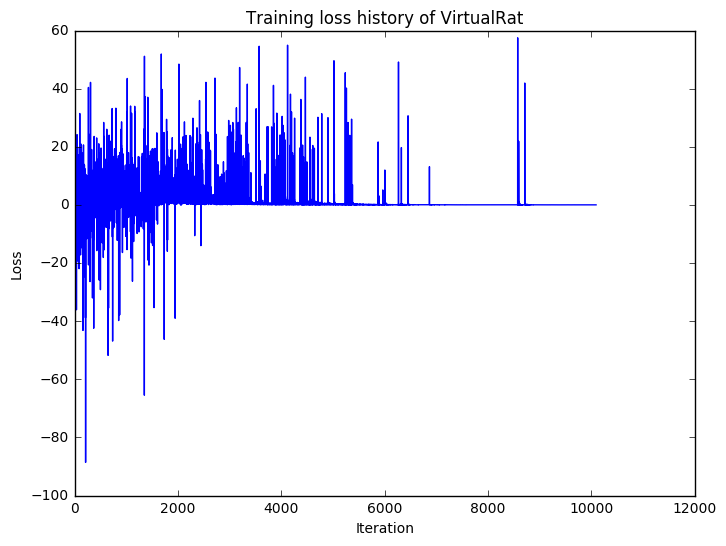

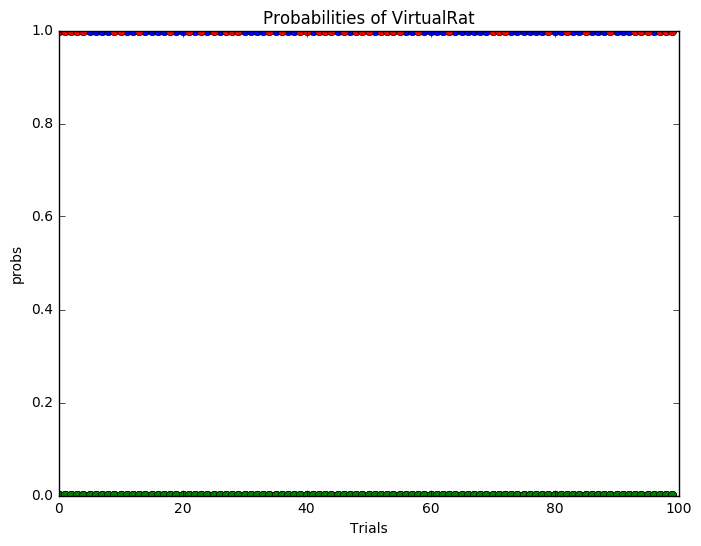

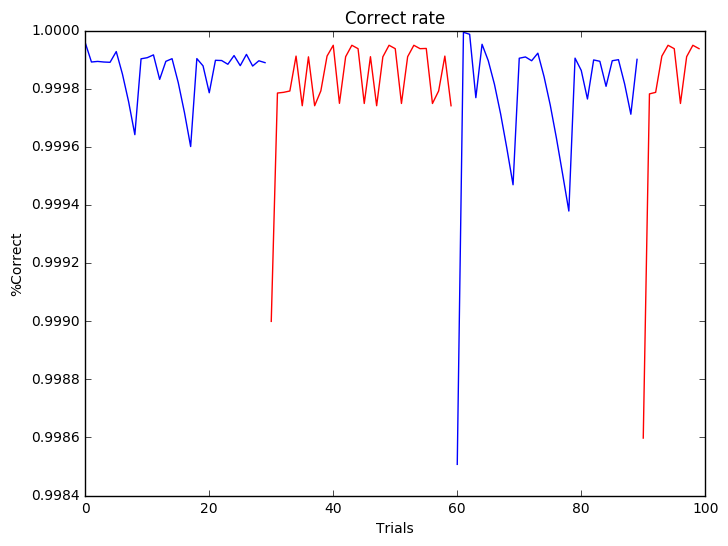

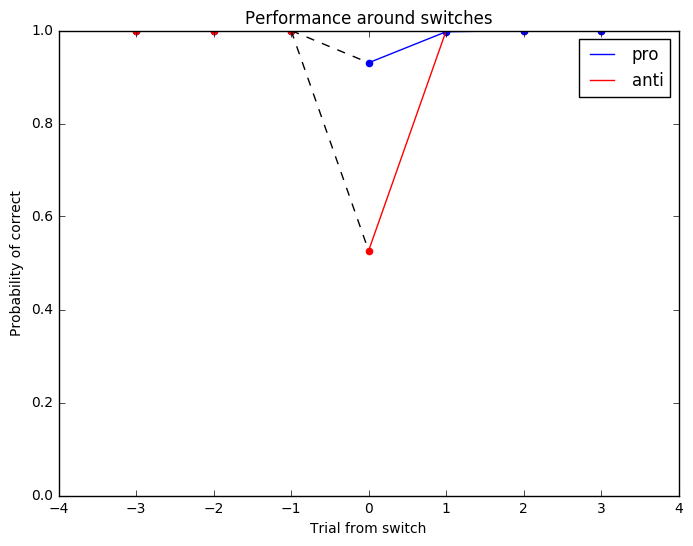

In [18]:
rat = SimRat(model)
probs = rat.predict(val_X,val_y)
ratname = 'VirtualRat'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 100)
sample_correct_rate(rat, sample = 100)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)